
<br>
<center>
<font size='7' style="color:#0D47A1">  <b>Exploratory Analysis & <br><br> Feature Selection</b> </font>
</center>

<hr style= "height:3px;">
<br>


<hr style= "height:1px;">
<font size='6' style="color:#000000">  <b>Content</b> </font>
<a name="content"></a>
<br>
<br>

1. [Abstract](#abstract) 
<br>

2. [Setup](#setup)
<br>

3. [Loading Data](#loading)
<br>

4. [Explore the Data](#exploration)
<br>

5. [Data Cleaning](#cleaning)
<br>

6. [Feature Selection](#features)
<br>

7. [Results & Discussion](#results)
<br>

8. [Perspectives](#perspectives)
<br>

9. [References](#references)
<br>

<hr style= "height:1px;">

<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>1. Abstract</b> </font>
<a name="setup"></a>

[[ Back to Top ]](#content)
<br>
<br>

<font size='4'>

In this Notebook e performed a basic data exploration, cleaning, analysis and feature selection for the Delaney's solubility dataset. After removing anomalous data points from the dataset and performing feature selection we save the new dataset as a csv file to use it for ML models. 

</font> 

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>Purpose</b></font>

<br>
<font size='4'>
    
We will perform data cleaning, data analysis and feature selection of the raw dataset to obtain more accurate ML models. 

</font> 


<br>
<br>


<br>
<br>
<font size='5' style="color:#4CAF50">  <b>Goals</b></font>


 - Remove anomalies from the dataset.
 - Perform a feature importance ranking.
 - Add relevant molecular descriptors as features.
 - Perform a multocollinearity analysis of the features.
 - Obtain a new processed dataset for the ML models.
 

<br>
<br>
<font size='5' style="color:#4CAF50">  <b>Methodology/Plan</b></font>

1. Data Cleaning.
 - Remove anomalies.
2. Feature Selection.
 - Ranking if the origianl features.
 - Add relevant molecular descriptors.
 - Ranking of new features.
3. Generate new pre-processed dataset.
 



<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>2. Setup</b> </font>
<a name="setup"></a>

[[ Back to Top ]](#content)
<br>
<br>

The following imports are divided by sections according to their role in the notebook. 



In [18]:

# Data Science 
# ==============================================================================
import pandas as pd
import numpy as np


# Sklearn Basic imports
# ==============================================================================
from sklearn import metrics
from sklearn.model_selection import train_test_split


# Sklearn ML model realted imports
# ==============================================================================
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


# Sklearn anomaly detection and feature selection
# ==============================================================================
from sklearn.ensemble import IsolationForest
from sklearn.inspection import permutation_importance


# Rdkit import for molecular features
# ==============================================================================
!pip install rdkit-pypi
import rdkit
import rdkit.Chem
import rdkit.Chem.Fragments
import rdkit.Chem.Descriptors
import rdkit.Chem.rdchem
from rdkit.Chem import Draw


# Multicollinearity analysis
# ==============================================================================
from scipy.stats import spearmanr
from scipy.cluster import hierarchy


# Ploting 
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns


# Image processing
# ==============================================================================
from PIL import Image
import io


# HTML Widgets
# ==============================================================================
import plotly.graph_objs as go
from ipywidgets import HTML
from ipywidgets import Image, Layout
from ipywidgets import HBox, VBox


In [19]:
import bokeh

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>3. Loading Data</b> </font>
<a name="loading"></a>

[[ Back to Top ]](#content)

<br>
<br>
<br>


In [20]:

# Load the raw data
# ==============================================================================
df_raw = pd.read_csv('https://raw.githubusercontent.com/LilianaArguello/RIIA_test/main/data/delaney-processed.csv')
df_raw.head()


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [21]:

# Quick overview of the data statistics
# ==============================================================================
df_raw.describe()


,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


In [22]:

# We whould never modify the raw external data so here we take the data we need and store it in our own
# dataframe for further analysis
# ==============================================================================
df = df_raw[['Molecular Weight','Minimum Degree','Number of H-Bond Donors','Number of Rotatable Bonds',
             'Polar Surface Area','Number of Rings','smiles','measured log solubility in mols per litre']]
df.head()


,Molecular Weight,Minimum Degree,Number of H-Bond Donors,Number of Rotatable Bonds,Polar Surface Area,Number of Rings,smiles,measured log solubility in mols per litre
0,457.432,1,7,7,202.32,3,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,201.225,1,1,2,42.24,2,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,152.237,1,0,4,17.07,0,CC(C)=CCCC(C)=CC(=O),-2.06
3,278.354,2,0,0,0.00,5,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,84.143,2,0,0,0.00,1,c1ccsc1,-1.33


In [23]:

# Let's take a look at the molecules' statistics grouping them by their number of rings
# Having rings is an important molecular descriptor 
# ==============================================================================
df.groupby('Number of Rings').describe()['Molecular Weight']


,count,mean,std,min,25%,50%,75%,max
Number of Rings,,,,,,,,
0,317.0,129.929306,67.641041,16.043,87.12200,112.9870,156.26900,384.487
1,386.0,183.279083,75.329183,58.080,124.13900,165.6840,226.27600,430.934
2,221.0,245.342665,87.359816,117.151,167.25800,232.3270,303.67100,498.662
3,116.0,294.051284,84.638532,152.196,238.03025,287.4865,349.68700,505.206
4,63.0,317.312937,64.425228,202.256,269.36400,314.4250,361.45800,478.513
5,16.0,319.547250,86.175371,252.316,252.31600,273.3565,384.29050,527.414
6,4.0,431.788250,116.709643,276.338,380.05700,452.6345,504.36575,545.546
7,3.0,466.834333,149.220630,300.360,405.97050,511.5810,550.07150,588.562
8,2.0,772.949500,11.313001,764.950,768.94975,772.9495,776.94925,780.949


In [24]:

# Generate the Python Mols objects
# ==============================================================================
df_raw['mol'] = df_raw['smiles'].apply(lambda x: rdkit.Chem.MolFromSmiles(x))


In [25]:

# Generate the images for the molecules
# ==============================================================================
df_raw['img'] = df_raw['mol'].apply(lambda m: Draw.MolToImage(m))


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>4. Explore the Data</b> </font>
<a name="exploration"></a>

[[ Back to Top ]](#content)

<br>
<br>
<br>


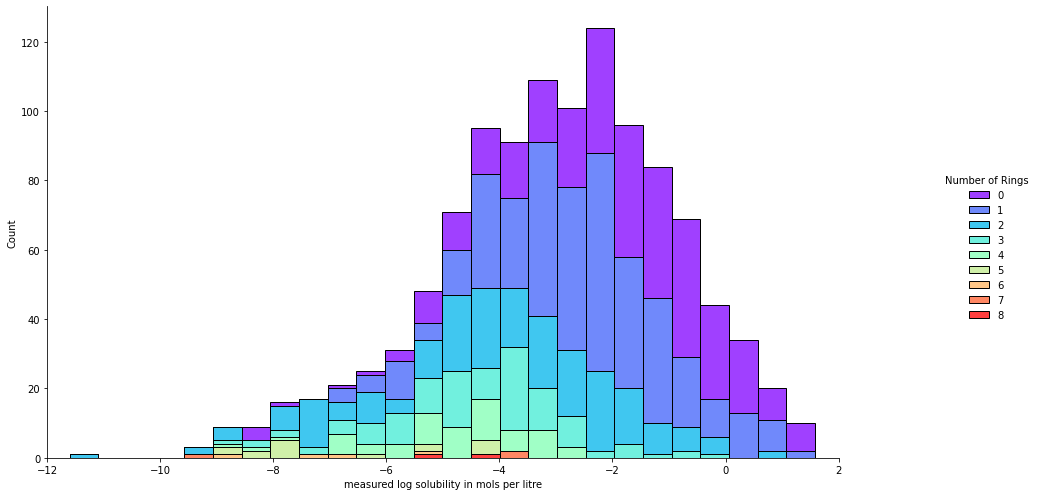

In [26]:

# It is important to know the distribution of the target variable
# ==============================================================================
sol_hist = sns.displot(x='measured log solubility in mols per litre', hue='Number of Rings', 
           palette='rainbow', height=7, data=df, multiple="stack")

sol_hist.fig.set_figwidth(15)
plt.xlim(-12, 2)
plt.show()


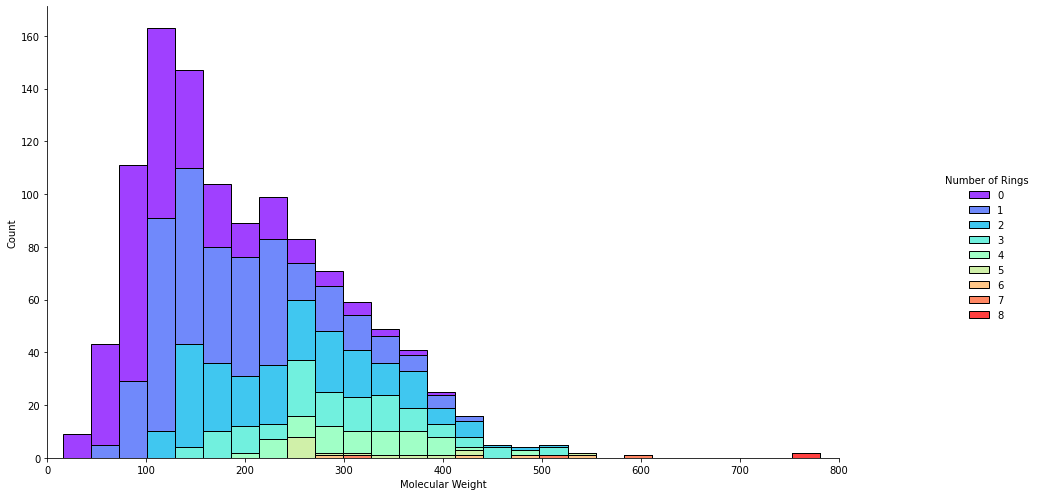

In [27]:

# We should also know how our independent varibles are distributed
# ==============================================================================
mw_hist = sns.displot(x='Molecular Weight', hue='Number of Rings', palette='rainbow', height=7,
           data=df, multiple="stack")

mw_hist.fig.set_figwidth(15)
plt.xlim(0,800)
plt.show()


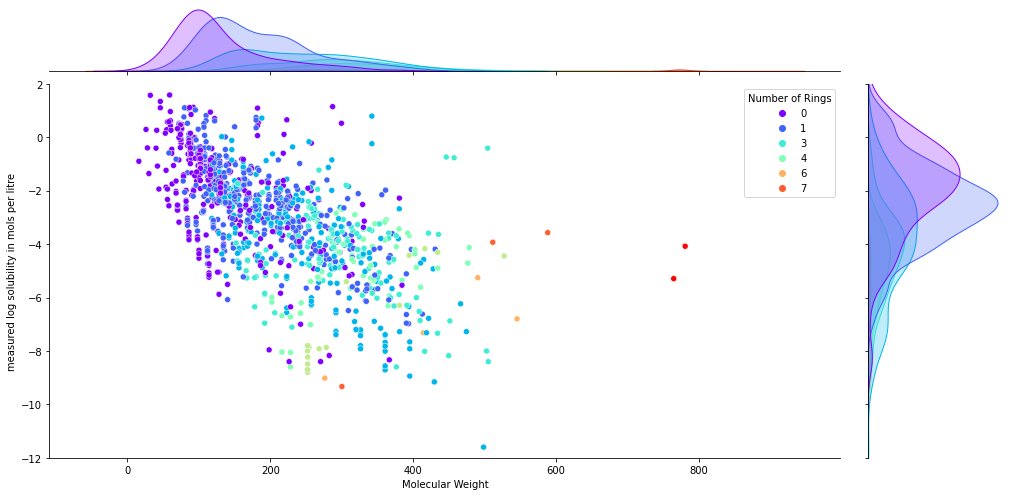

In [28]:

# Here we show the distribution of both the solubility and the molecular weight.
# Both variables grouped by the number of rings in the molecules.
# ==============================================================================
jointplot_mw = sns.jointplot(x='Molecular Weight', y='measured log solubility in mols per litre', 
               hue='Number of Rings', 
               palette='rainbow', height=7,
               data=df)

jointplot_mw.fig.set_figwidth(15)
plt.ylim(-12,2)
plt.show()


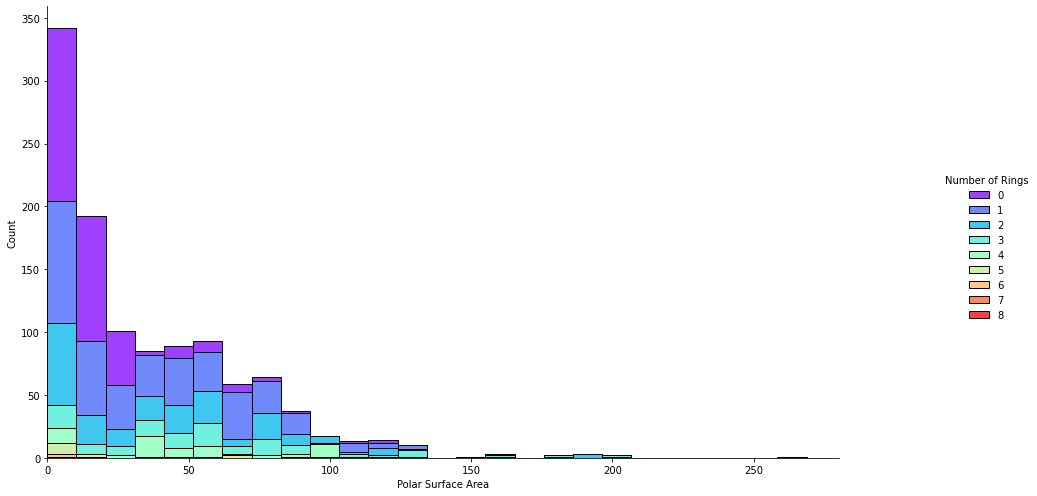

In [29]:

# Same analysis as before for the polar surface area
# ==============================================================================
sol_hist = sns.displot(x='Polar Surface Area', hue='Number of Rings', palette='rainbow', height=7,
           data=df, multiple="stack")

sol_hist.fig.set_figwidth(15)
plt.xlim(0,280)
plt.show()


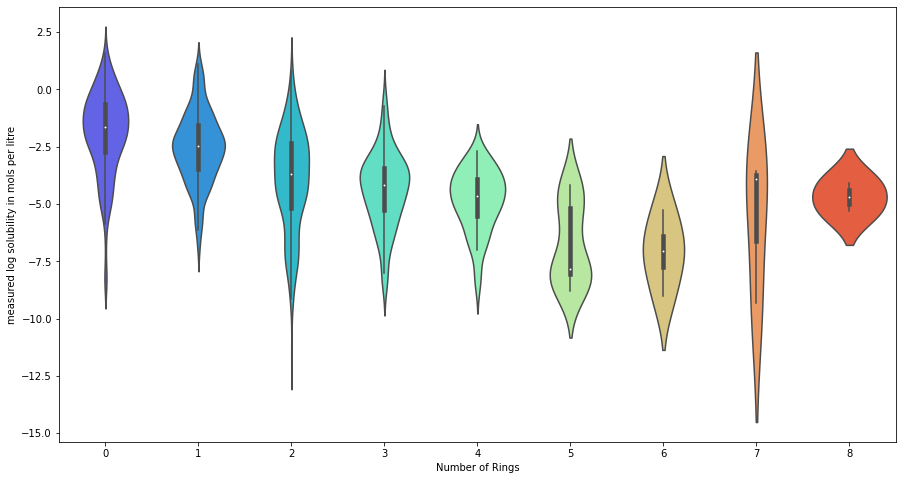

In [30]:

# This violon plot shows the distribution of the measured solubilities as a funciton of molecular weight
# Molecules are again gruped by their number of rings
# ==============================================================================
plt.figure(figsize=(15,8))

mw_boxplot = sns.violinplot(x='Number of Rings', y='measured log solubility in mols per litre',  
             palette='rainbow',
             data=df)


plt.show()


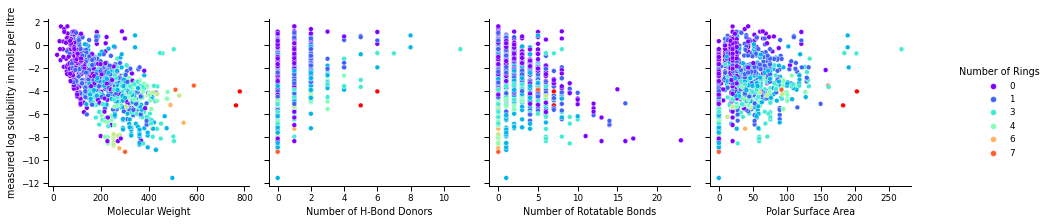

In [31]:

# Here we show the relationship that exist beetwenn our tarhet variablle and the independent variables
# ==============================================================================
sns.set_context("paper")
pairplot = sns.pairplot(df,
             x_vars=['Molecular Weight','Number of H-Bond Donors',
                     'Number of Rotatable Bonds','Polar Surface Area'],
             y_vars=['measured log solubility in mols per litre'],
             hue='Number of Rings',
             palette='rainbow')

pairplot.fig.set_figheight(5)
pairplot.fig.set_figwidth(15)


plt.show()

In [32]:
df_raw

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,mol,img
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x7f1bf76f60d0>,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x7f1bf76f6b20>,<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x7f1bf76f6df0>,<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x7f1bf7712b70>,<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x7f1bf7712990>,<PIL.PngImagePlugin.PngImageFile image mode=RG...
...,...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br,<rdkit.Chem.rdchem.Mol object at 0x7f1bf779e850>,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f1bf779e350>,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC,<rdkit.Chem.rdchem.Mol object at 0x7f1bf779e6c0>,<PIL.PngImagePlugin.PngImageFile image mode=RG...
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C,<rdkit.Chem.rdchem.Mol object at 0x7f1bf779e8a0>,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [33]:
from rdkit.Chem import PandasTools

In [34]:
df_raw['mol'] = df_raw['smiles'].apply(lambda x: rdkit.Chem.MolFromSmiles(x))

In [35]:
df_raw['img'] = df_raw['mol'].apply(lambda m: rdkit.Chem.Draw.MolToImage(m))

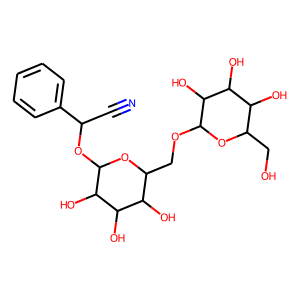

In [36]:
df_raw.iloc[0]['img']

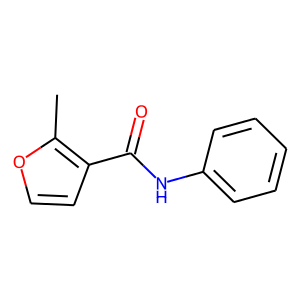

In [37]:
df_raw.iloc[1]['img']

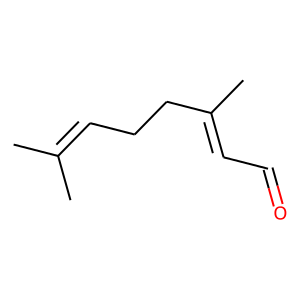

In [38]:
df_raw.iloc[2]['img']

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>5. Data Cleaning</b> </font>
<a name="cleaning"></a>

[[ Back to Top ]](#content)

<br>
<br>
<br>



# Multivariate Outlier Analysis: Anomaly Detection


In [39]:

# Here we separate the independent variables for their analysis
# ==============================================================================
X = df[['Molecular Weight','Minimum Degree','Number of H-Bond Donors','Number of Rotatable Bonds',
             'Polar Surface Area','Number of Rings']]
X.head()


,Molecular Weight,Minimum Degree,Number of H-Bond Donors,Number of Rotatable Bonds,Polar Surface Area,Number of Rings
0,457.432,1,7,7,202.32,3
1,201.225,1,1,2,42.24,2
2,152.237,1,0,4,17.07,0
3,278.354,2,0,0,0.00,5
4,84.143,2,0,0,0.00,1


In [40]:

# Definition and training of the IsolationForest Model for Anomaly detection
# Pleasenote that this is a unsupervised model and hence thereis no objective way to train it
# The following is a Naive set of parammeters
# ==============================================================================
modelo_isof = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.1,
                random_state  = 0)

modelo_isof.fit(X)


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=1000,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [41]:

# Prediction from the Anomaly Detection Model
# ==============================================================================
X['anomaly'] = modelo_isof.predict(X)    # Anomaly prediction| 1:Ok | -1:Anomaly


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:

# Number of anomalies predicted by the number of rings in the molecule
# ==============================================================================
anomaly       = X.loc[X['anomaly']==-1]
anomaly_index = list(anomaly.index)
anomaly.groupby('Number of Rings').describe()['Molecular Weight']



,count,mean,std,min,25%,50%,75%,max
Number of Rings,,,,,,,,
0,12.0,252.466000,76.532838,122.120,215.37900,235.4335,290.53350,384.487
1,21.0,197.793429,130.047872,68.075,79.10200,180.1560,346.36500,390.564
2,21.0,207.716905,105.421478,117.151,120.15100,169.2270,286.15600,466.479
3,22.0,334.775727,121.792555,167.211,236.04975,337.5230,443.67400,505.206
4,15.0,307.430067,103.102936,202.256,222.28850,256.3080,393.45300,478.513
5,12.0,318.292167,97.466643,252.316,252.31600,253.3240,399.96300,527.414
6,4.0,431.788250,116.709643,276.338,380.05700,452.6345,504.36575,545.546
7,3.0,466.834333,149.220630,300.360,405.97050,511.5810,550.07150,588.562
8,2.0,772.949500,11.313001,764.950,768.94975,772.9495,776.94925,780.949


In [43]:

# Dataset free of anomalies
# ==============================================================================
df_clean = df.loc[X['anomaly']==1]
df_clean_index = list(df_clean.index)
df_clean.groupby('Number of Rings').describe()['Molecular Weight']


,count,mean,std,min,25%,50%,75%,max
Number of Rings,,,,,,,,
0,305.0,125.108190,62.673339,16.043,86.178,106.5960,144.2580,380.784
1,365.0,182.444011,71.131930,58.080,126.115,165.1920,225.3130,430.934
2,200.0,249.293370,84.587596,118.179,169.235,239.5100,309.8185,498.662
3,94.0,284.520032,70.884989,152.196,241.032,285.0445,336.6105,449.856
4,48.0,320.401333,47.622608,242.321,288.420,315.4770,360.4500,434.504
5,4.0,323.312500,47.679826,268.359,296.976,321.9890,348.3255,380.913


<br>
<br>
<br>

# Comparison of the raw and clean features



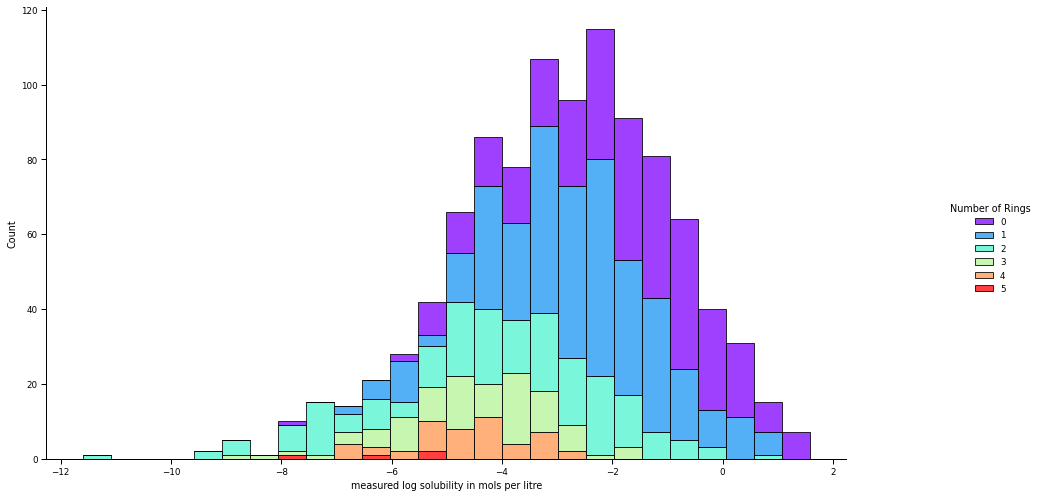

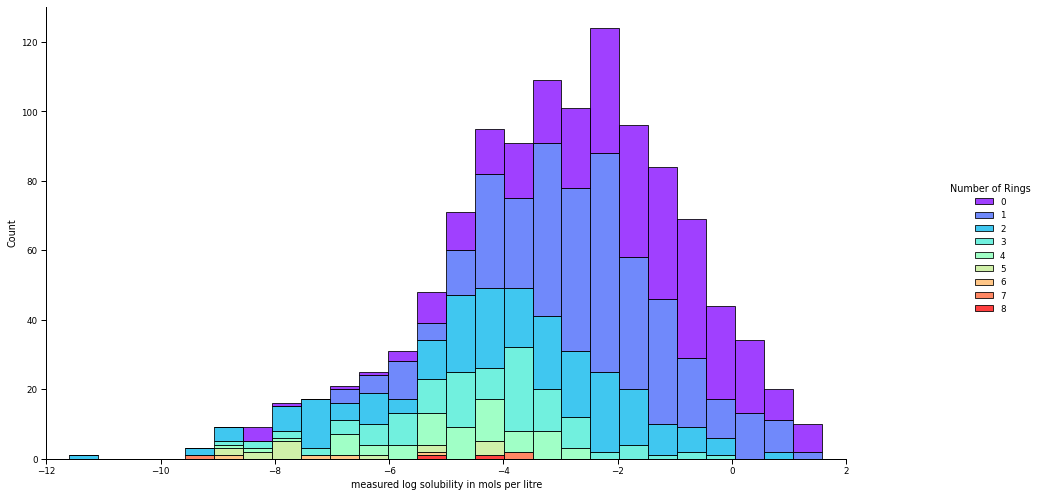

In [44]:

# Anomaly-free and raw solubility
# ==============================================================================
sol_hist_clean = sns.displot(x='measured log solubility in mols per litre', hue='Number of Rings', palette='rainbow', height=7,
           data=df_clean, multiple="stack")

sol_hist_clean.fig.set_figwidth(15)

# ==============================================================================

sol_hist = sns.displot(x='measured log solubility in mols per litre', hue='Number of Rings', palette='rainbow', height=7,
           data=df, multiple="stack")

sol_hist.fig.set_figwidth(15)


plt.xlim(-12, 2)
plt.show()


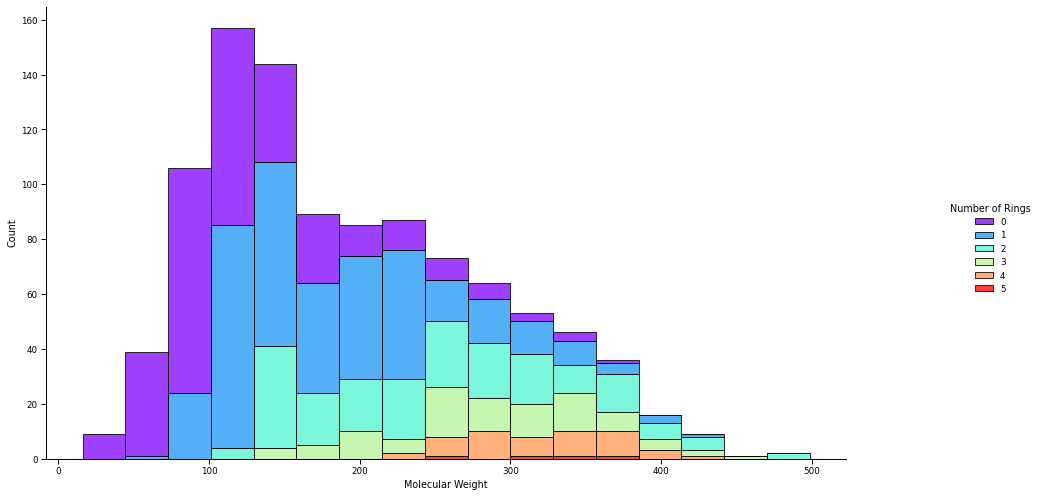

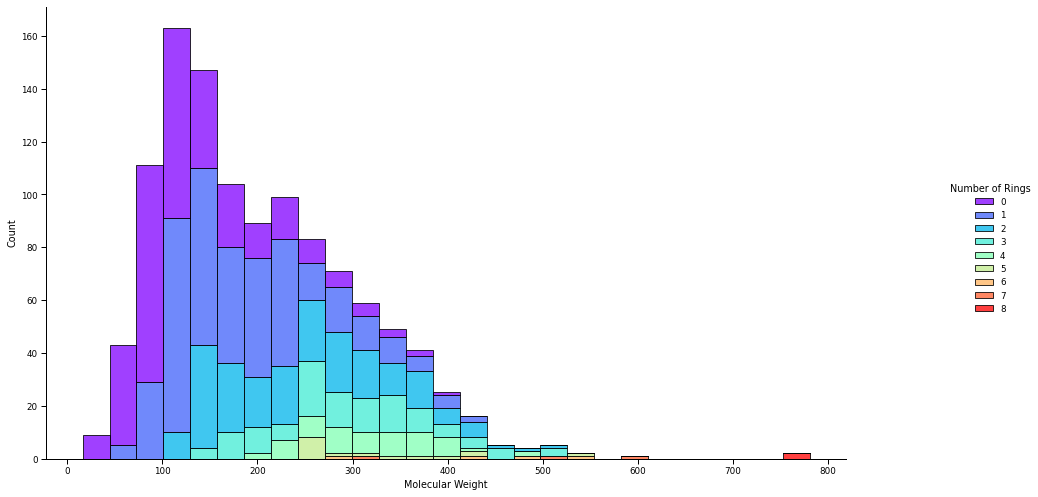

In [45]:

# Anomaly-free and raw molecular weight
# ==============================================================================
mw_hist_clean = sns.displot(x='Molecular Weight', hue='Number of Rings', palette='rainbow', height=7,
           data=df_clean, multiple="stack")

mw_hist_clean.fig.set_figwidth(15)

# ==============================================================================

mw_hist = sns.displot(x='Molecular Weight', hue='Number of Rings', palette='rainbow', height=7,
           data=df, multiple="stack")

mw_hist.fig.set_figwidth(15)
plt.show()


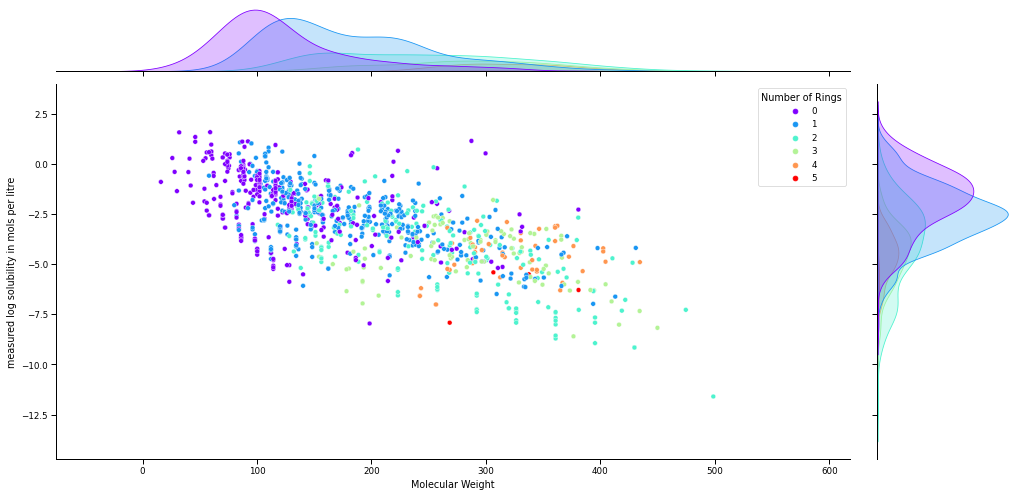

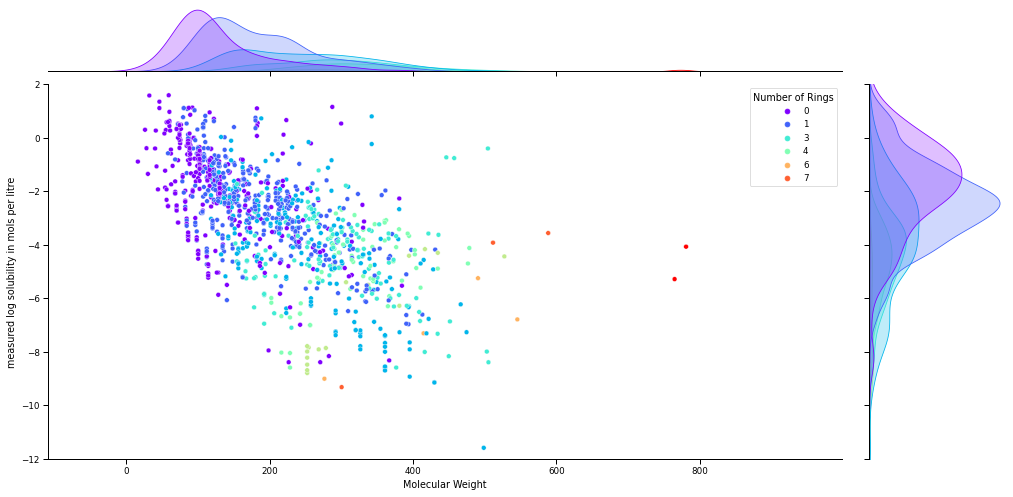

In [46]:

# Anomaly-free and raw molecular distribution of solubilities vs molecular weights
# ==============================================================================
jointplot_mw_clean = sns.jointplot(x='Molecular Weight', y='measured log solubility in mols per litre', hue='Number of Rings', 
           palette='rainbow', height=7,
           data=df_clean)

jointplot_mw_clean.fig.set_figwidth(15)

# ==============================================================================

jointplot_mw = sns.jointplot(x='Molecular Weight', y='measured log solubility in mols per litre', hue='Number of Rings', 
           palette='rainbow', height=7,
           data=df)

jointplot_mw.fig.set_figwidth(15)


plt.ylim(-12,2)
plt.show()


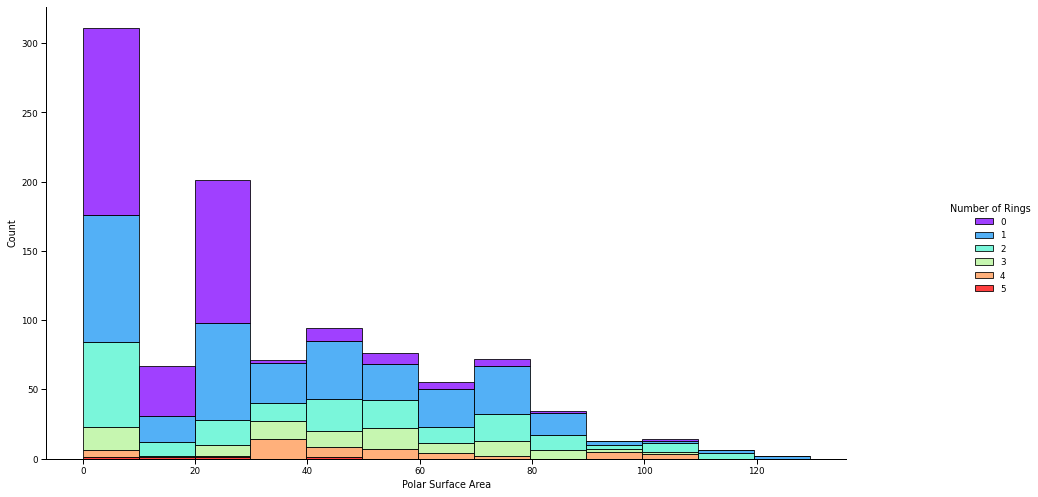

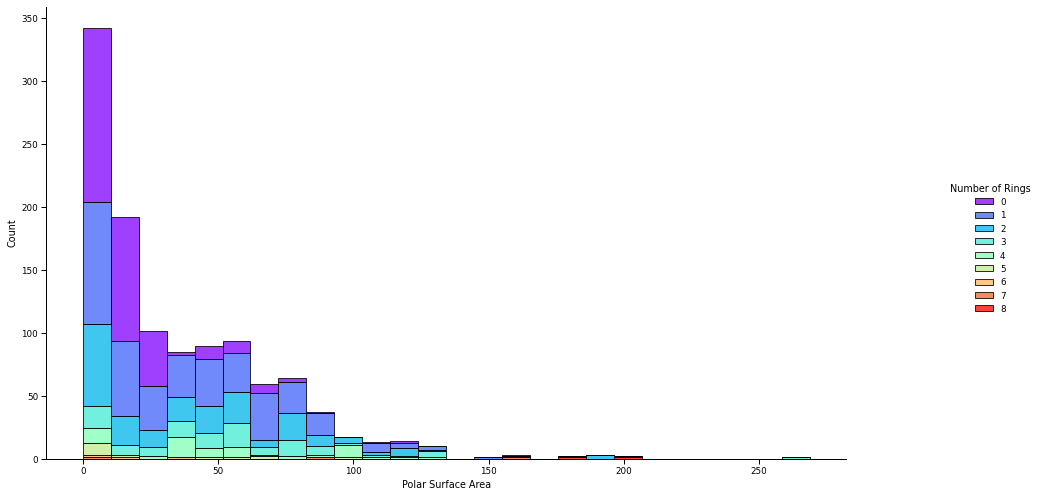

In [47]:

# Anomaly-free and raw molecular polar surface area
# ==============================================================================
sol_hist_clean = sns.displot(x='Polar Surface Area', hue='Number of Rings', palette='rainbow', height=7,
           data=df_clean, multiple="stack")

sol_hist_clean.fig.set_figwidth(15)

# ==============================================================================

sol_hist = sns.displot(x='Polar Surface Area', hue='Number of Rings', palette='rainbow', height=7,
           data=df, multiple="stack")

sol_hist.fig.set_figwidth(15)
plt.show()


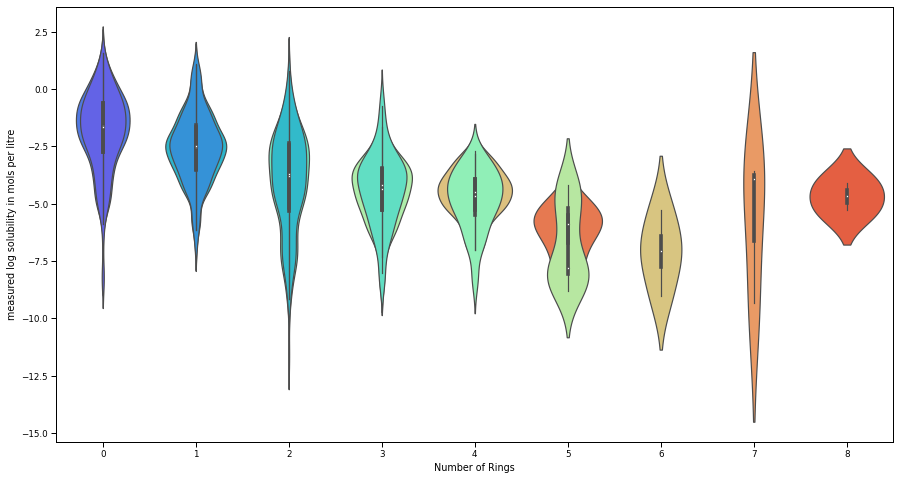

In [48]:

# Anomaly-free and raw violinn plots analysis
# ==============================================================================
plt.figure(figsize=(15,8))

mw_boxplot_clean = sns.violinplot(x='Number of Rings', y='measured log solubility in mols per litre',  
             palette='rainbow',
             data=df_clean)

# ==============================================================================

mw_boxplot = sns.violinplot(x='Number of Rings', y='measured log solubility in mols per litre',  
             palette='rainbow',
             data=df)

plt.show()


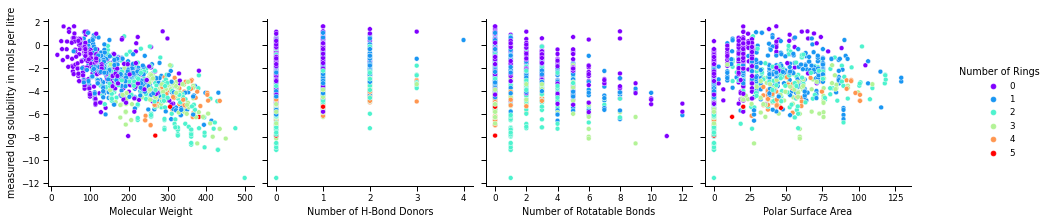

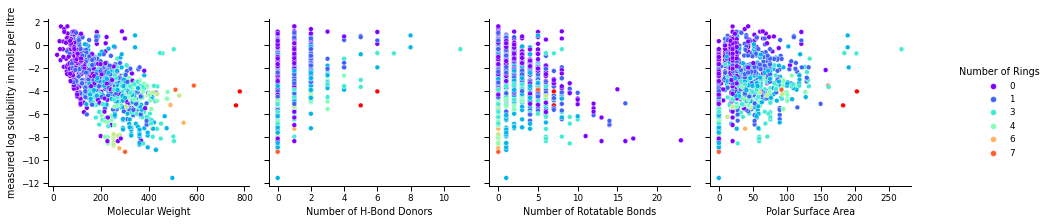

In [49]:

# Anomaly-free and raw feature distributio analysis
# ==============================================================================
sns.set_context("paper")
pairplot_clean = sns.pairplot(df_clean,
             x_vars=['Molecular Weight','Number of H-Bond Donors',
                     'Number of Rotatable Bonds','Polar Surface Area'],
             y_vars=['measured log solubility in mols per litre'],
             hue='Number of Rings',
             palette='rainbow')

pairplot_clean.fig.set_figheight(5)
pairplot_clean.fig.set_figwidth(15)

# ==============================================================================

pairplot = sns.pairplot(df,
             x_vars=['Molecular Weight','Number of H-Bond Donors',
                     'Number of Rotatable Bonds','Polar Surface Area'],
             y_vars=['measured log solubility in mols per litre'],
             hue='Number of Rings',
             palette='rainbow')

pairplot.fig.set_figheight(5)
pairplot.fig.set_figwidth(15)
plt.show()


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>6. Feature Selection</b> </font>
<a name="features"></a>

[[ Back to Top ]](#content)

<br>
<br>
<br>



# Feauture Importance for the Original Features


In [50]:

# Here we pick the feautures after data cleaning
# ==============================================================================
X_clean = X.loc[X['anomaly']==1]
X_clean.drop(columns='anomaly', inplace=True);


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:

# Anomaly-free target variable
# ==============================================================================
y_clean = df_clean['measured log solubility in mols per litre']


In [52]:

# Train-Test split for the regressor model
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=0)


In [53]:

# Pre-processing of the features
# ==============================================================================
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [54]:

# Setup and training of a simple regressor model
# ==============================================================================
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [55]:

# Performance metrics for the regressor model
# ==============================================================================
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.6466845032645552
Mean Squared Error: 0.7943534712721737
Root Mean Squared Error: 0.8912650959575236


In [56]:

# Feature ranking using Permutation Feature Importance
# ==============================================================================
feature_ranking = permutation_importance(regressor, X_train, y_train,
                  n_repeats=100, random_state=0)


In [57]:

# Ordering the features by their relevance
# ==============================================================================
perm_sorted_idx = feature_ranking.importances_mean.argsort()


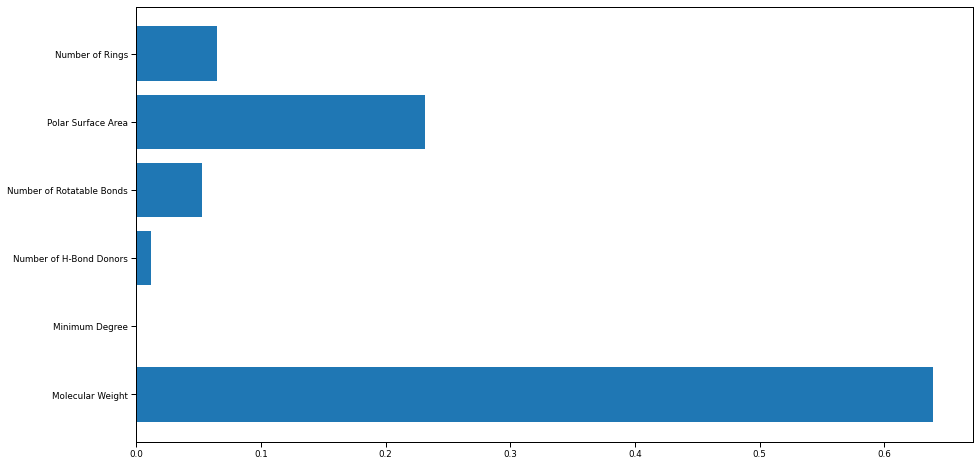

In [58]:

# Feature ranking using the simple Random Forest Regressor
# ==============================================================================
plt.figure(figsize=(15,8))
plt.barh(X_clean.columns, regressor.feature_importances_)
plt.show()


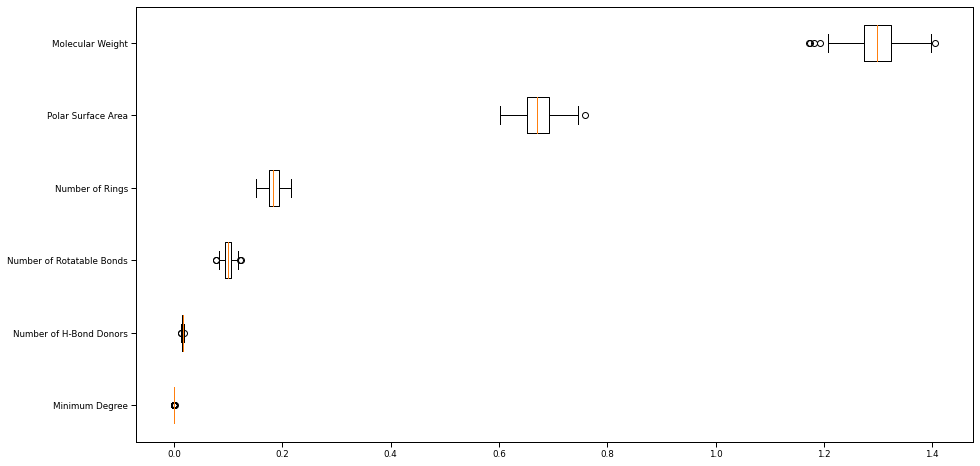

In [59]:

# Feature ranking using the Permutation Feature Importance 
# ==============================================================================
plt.figure(figsize=(15,8))
plt.boxplot(feature_ranking.importances[perm_sorted_idx].T, vert=False,
            labels=X_clean.columns[perm_sorted_idx])
plt.show()


<br>
<br>
<br>

# Creating New Features


In [60]:

# Adding molecular objects to the clean dataframe 
# ==============================================================================
df_clean['mol'] = df_clean['smiles'].apply(rdkit.Chem.MolFromSmiles)
df_clean.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Molecular Weight,Minimum Degree,Number of H-Bond Donors,Number of Rotatable Bonds,Polar Surface Area,Number of Rings,smiles,measured log solubility in mols per litre,mol
1,201.225,1,1,2,42.24,2,Cc1occc1C(=O)Nc2ccccc2,-3.30,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,152.237,1,0,4,17.07,0,CC(C)=CCCC(C)=CC(=O),-2.06,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,84.143,2,0,0,0.00,1,c1ccsc1,-1.33,"<img data-content=""rdkit/molecule"" src=""data:i..."
5,135.191,2,0,0,12.89,2,c2ccc1scnc1c2,-1.50,"<img data-content=""rdkit/molecule"" src=""data:i..."
6,326.437,1,0,1,0.00,2,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl,-7.32,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [61]:

# Adding the nummber of valence electrons
# ==============================================================================
df_clean['Number of Valence Electrons'] = df_clean['mol'].apply(rdkit.Chem.Descriptors.NumValenceElectrons)
df_clean.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Molecular Weight,Minimum Degree,Number of H-Bond Donors,Number of Rotatable Bonds,Polar Surface Area,Number of Rings,smiles,measured log solubility in mols per litre,mol,Number of Valence Electrons
1,201.225,1,1,2,42.24,2,Cc1occc1C(=O)Nc2ccccc2,-3.30,"<img data-content=""rdkit/molecule"" src=""data:i...",76
2,152.237,1,0,4,17.07,0,CC(C)=CCCC(C)=CC(=O),-2.06,"<img data-content=""rdkit/molecule"" src=""data:i...",62
4,84.143,2,0,0,0.00,1,c1ccsc1,-1.33,"<img data-content=""rdkit/molecule"" src=""data:i...",26
5,135.191,2,0,0,12.89,2,c2ccc1scnc1c2,-1.50,"<img data-content=""rdkit/molecule"" src=""data:i...",44
6,326.437,1,0,1,0.00,2,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl,-7.32,"<img data-content=""rdkit/molecule"" src=""data:i...",88


In [62]:

# Function to calculate the number of aromatic atoms in a molecule
# ==============================================================================
def number_Aromatic_Atoms(mol):
    return sum([1 for _ in mol.GetAromaticAtoms()])


In [63]:

# Adding the number of aromatic atoms for each molecule
# ==============================================================================
df_clean['Number of Aromatic Atoms'] = df_clean['mol'].apply(number_Aromatic_Atoms)
df_clean.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Molecular Weight,Minimum Degree,Number of H-Bond Donors,Number of Rotatable Bonds,Polar Surface Area,Number of Rings,smiles,measured log solubility in mols per litre,mol,Number of Valence Electrons,Number of Aromatic Atoms
1,201.225,1,1,2,42.24,2,Cc1occc1C(=O)Nc2ccccc2,-3.30,"<img data-content=""rdkit/molecule"" src=""data:i...",76,11
2,152.237,1,0,4,17.07,0,CC(C)=CCCC(C)=CC(=O),-2.06,"<img data-content=""rdkit/molecule"" src=""data:i...",62,0
4,84.143,2,0,0,0.00,1,c1ccsc1,-1.33,"<img data-content=""rdkit/molecule"" src=""data:i...",26,5
5,135.191,2,0,0,12.89,2,c2ccc1scnc1c2,-1.50,"<img data-content=""rdkit/molecule"" src=""data:i...",44,9
6,326.437,1,0,1,0.00,2,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl,-7.32,"<img data-content=""rdkit/molecule"" src=""data:i...",88,12


In [64]:

# Function to calculate the number of conjugated bonds that are nt part of a ring
# ==============================================================================
def number_Conjugated_bonds(mol):
        return sum([1 for bond in mol.GetBonds() if (bond.GetIsConjugated() and not bond.IsInRing())])


In [65]:

# Adding the number of aromatic atoms for each molecule
# ==============================================================================
df_clean['Number of Conjugated Bonds'] = df_clean['mol'].apply(number_Conjugated_bonds)
df_clean


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Molecular Weight,Minimum Degree,Number of H-Bond Donors,Number of Rotatable Bonds,Polar Surface Area,Number of Rings,smiles,measured log solubility in mols per litre,mol,Number of Valence Electrons,Number of Aromatic Atoms,Number of Conjugated Bonds
1,201.225,1,1,2,42.24,2,Cc1occc1C(=O)Nc2ccccc2,-3.300,"<img data-content=""rdkit/molecule"" src=""data:i...",76,11,4
2,152.237,1,0,4,17.07,0,CC(C)=CCCC(C)=CC(=O),-2.060,"<img data-content=""rdkit/molecule"" src=""data:i...",62,0,3
4,84.143,2,0,0,0.00,1,c1ccsc1,-1.330,"<img data-content=""rdkit/molecule"" src=""data:i...",26,5,0
5,135.191,2,0,0,12.89,2,c2ccc1scnc1c2,-1.500,"<img data-content=""rdkit/molecule"" src=""data:i...",44,9,0
6,326.437,1,0,1,0.00,2,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl,-7.320,"<img data-content=""rdkit/molecule"" src=""data:i...",88,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1123,197.381,1,0,0,0.00,0,FC(F)(F)C(Cl)Br,-1.710,"<img data-content=""rdkit/molecule"" src=""data:i...",44,0,0
1124,219.266,1,1,1,71.00,0,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106,"<img data-content=""rdkit/molecule"" src=""data:i...",80,0,8
1125,246.359,1,0,7,18.46,0,CCSCCSP(=S)(OC)OC,-3.091,"<img data-content=""rdkit/molecule"" src=""data:i...",74,0,0
1126,72.151,1,0,1,0.00,0,CCC(C)C,-3.180,"<img data-content=""rdkit/molecule"" src=""data:i...",32,0,0


<br>

## From here on we fit a new model with the new features

In [66]:

# Selecting the set of features
# ==============================================================================
features = df_clean[['Molecular Weight','Polar Surface Area','Number of Rings','Number of Valence Electrons','Number of Aromatic Atoms','Number of Conjugated Bonds']]
features.head()


,Molecular Weight,Polar Surface Area,Number of Rings,Number of Valence Electrons,Number of Aromatic Atoms,Number of Conjugated Bonds
1,201.225,42.24,2,76,11,4
2,152.237,17.07,0,62,0,3
4,84.143,0.00,1,26,5,0
5,135.191,12.89,2,44,9,0
6,326.437,0.00,2,88,12,1


In [67]:

# Define the target variable
# ==============================================================================
target = df_clean['measured log solubility in mols per litre']


In [68]:

# Train-Test split for the new model
# ==============================================================================
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                           test_size=0.2, random_state=0)


In [69]:

# Pre-processing of the new features
# ==============================================================================
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)


In [70]:

# Training and predictions of the new model
# ==============================================================================
new_regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
new_regressor.fit(features_train, target_train)
target_pred = new_regressor.predict(features_test)


In [71]:

# Performance of the new model
# ==============================================================================
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred))
print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))


Mean Absolute Error: 0.583932726593034
Mean Squared Error: 0.6533165854654239
Root Mean Squared Error: 0.8082800167426039


In [72]:

# Ranking of the new model using PFI
# ==============================================================================
new_feature_ranking = permutation_importance(new_regressor, features_train, target_train,
                  n_repeats=100, random_state=0)


In [73]:

# Sorting the PFI results
# ==============================================================================
new_perm_sorted_idx = new_feature_ranking.importances_mean.argsort()


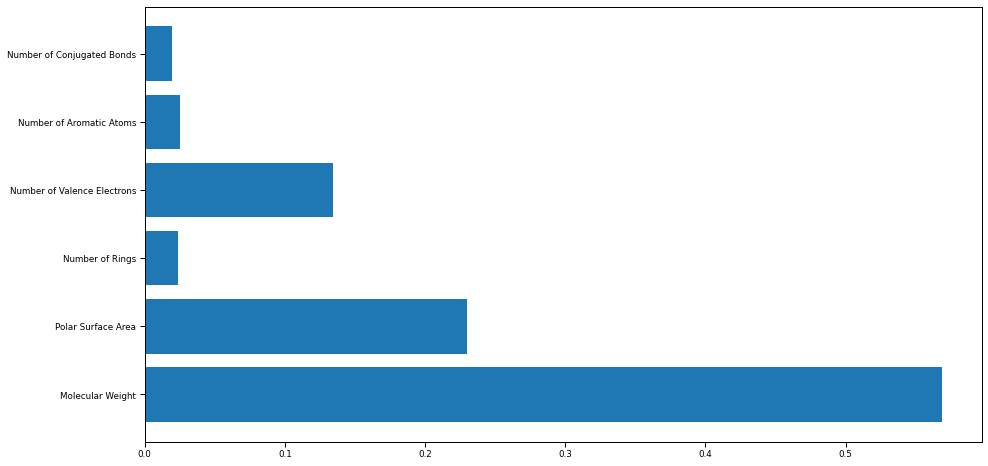

In [74]:

# Ranking of the regressor model
# ==============================================================================
plt.figure(figsize=(15,8))
plt.barh(features.columns, new_regressor.feature_importances_)
plt.show()


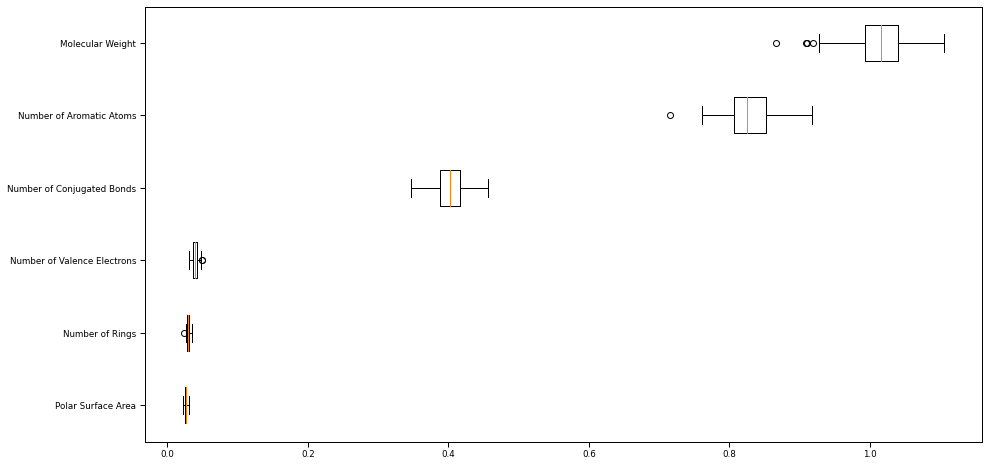

In [75]:

# New Model PFI ranking
# ==============================================================================
plt.figure(figsize=(15,8))
plt.boxplot(new_feature_ranking.importances[new_perm_sorted_idx].T, vert=False,
            labels=features.columns[perm_sorted_idx])
plt.show()


<br>
<br>
<br>

# Regaring Mulcollinearity

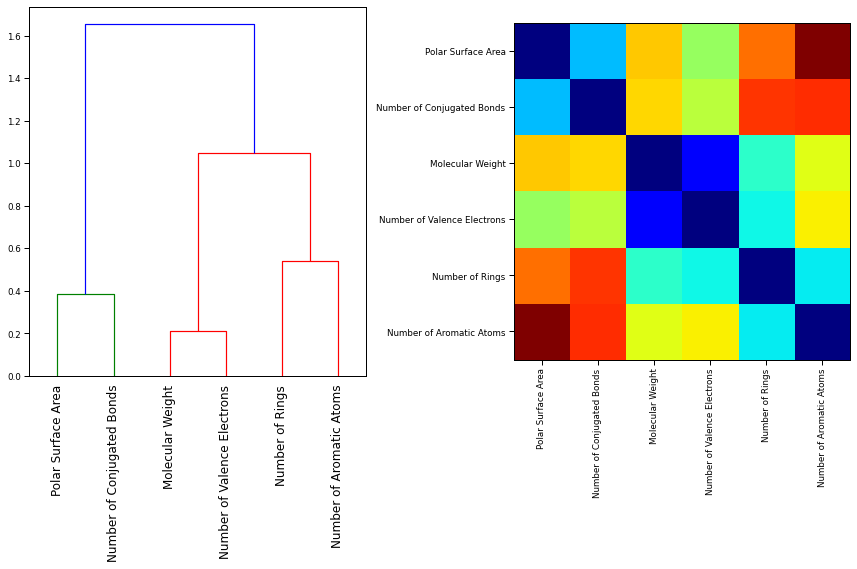

In [76]:


# Correlation and collinearity analysis between the new features
# ==============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

corr = spearmanr(features).correlation
corr_linkage = hierarchy.ward(corr)

dendro = hierarchy.dendrogram(
    corr_linkage, labels=features.columns, ax=ax1, leaf_rotation=90)

dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']], cmap='jet_r', )
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()


In [77]:

# Definition of the final dataframe
# ==============================================================================
final_df = df_clean[['Molecular Weight','Polar Surface Area','Number of Rings','Number of Rings',
                     'Number of Valence Electrons','Number of Aromatic Atoms','Number of Conjugated Bonds',
                     'measured log solubility in mols per litre']]
final_df.describe()


,Molecular Weight,Polar Surface Area,Number of Rings,Number of Rings,Number of Valence Electrons,Number of Aromatic Atoms,Number of Conjugated Bonds,measured log solubility in mols per litre
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,194.907611,31.736398,1.239173,1.239173,68.230315,4.820866,1.643701,-2.941244
std,92.854902,29.211065,1.139908,1.139908,31.406913,4.777348,1.875173,1.960723
min,16.043000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,-11.600000
25%,118.245000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,-4.191000
50%,173.090000,26.020000,1.000000,1.000000,60.000000,6.000000,1.000000,-2.770000
75%,262.004500,52.585000,2.000000,2.000000,90.000000,6.000000,3.000000,-1.585000
max,498.662000,129.420000,5.000000,5.000000,170.000000,18.000000,9.000000,1.580000


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>7. Results & Discussion</b> </font>
<a name="results"></a>

[[ Back to Top ]](#content)

<br>
<br>
<br>


<font size='4'>

The anomalous datapoints remove from the dataset were indeed molecules ith extreme values across one or many dimenions of the original dataset. The most obvous example is the identification as anomalies of the two molecules with a molecularweight ~800 and containing 8 rings. Such data points are indeed higly anomalous would ony induce errors in the training of any ML model. The reader is encourage to explore other points detected as anomalous and see how they present extreme values across different dimenions. 

After running a simple Isolation Forest model for feature selection we remove 3 out 6 of the origianl features adding 3 new ones. The new dataset performs better, as measure by MAE, compare with  the original dataset.

Finally, some collinearity was found in the final dataset, however, no further feature elimination was carried out. We will explore other feature selection stratgies once we build more ML models.


</font> 




<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:#00A6D6">  <b>8. Perspectives</b> </font>
<a name="perspectives"></a>

[[ Back to Top ]](#content)

<br>
<br>
<br>



    i.   The SMILES for all this work were not sanitized. Add this feature for future work.
    ii.  The Isolation Forest Model used standar parameters. Optimize this model. 
    iii. Explore other molecular descriptors.
    iv.  Expand the analysis for topological representations and descriptors. 

<br>
<br>
<br>
<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>9. References.</b> </font>
<a name="references"></a>

[[ Back to Top ]](#Table-of-contents)

[1] <a href=https://blog.paperspace.com/anomaly-detection-isolation-forest/>Anomaly Detection Using Isolation Forest in Python</a>

[2] <a href=https://christophm.github.io/interpretable-ml-book/feature-importance.html>Permutation Feature Importance</a>

[3] <a href=http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/4-5-Multiple-collinearity.html>Multicollinearity</a>